## Import Modul

In [1]:
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 

## Connecting String Sample

In [2]:
conn = sqlite3.connect(r'C:/sqlite/chinook.db')

## Check DB

## Analysis

### Total penjualan sales per negara

Text(0.5, 1.0, 'Total Penjualan per Negara (2009-2013)')

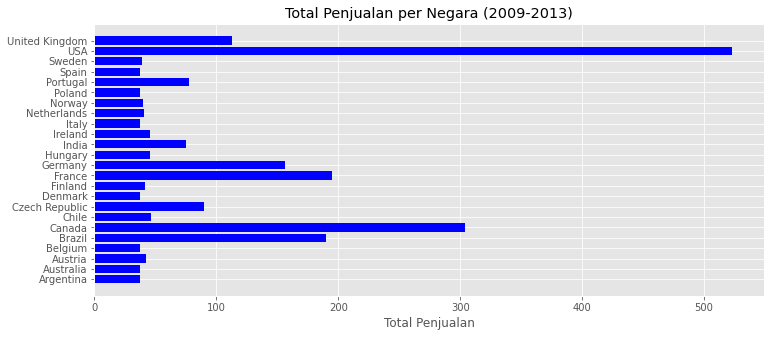

In [24]:
query1 = '''select BIllingCountry as "Negara", sum(Total) as "Total Penjualan"
from invoices
group by 1
order by 1 asc'''
df1 = pd.read_sql(query1, conn)

plt.figure(figsize = (12,5))
plt.barh(df1['Negara'], df1['Total Penjualan'], color='b')
plt.xlabel('Total Penjualan')
plt.title('Total Penjualan per Negara (2009-2013)')

Text(0.5, 1.0, 'Total Pembelian Negara USA (2009-2013)')

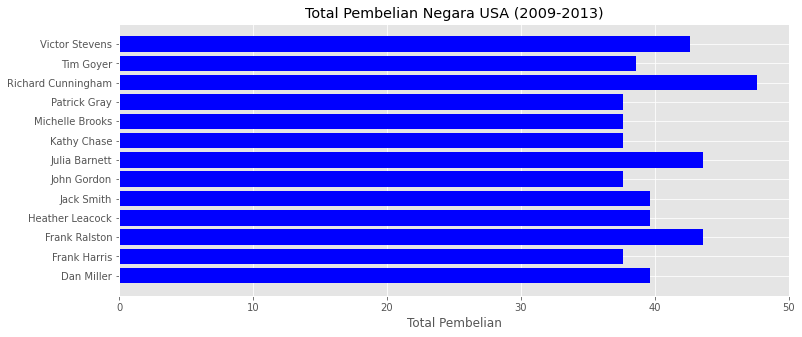

In [25]:
query2 = '''select c.FirstName || ' ' || c.LastName as "Full Name", i.CustomerId, 
count(i.CustomerID) as "Jumlah Transaksi", i.BillingCountry, sum(i.Total) as "Total Pembelian"
from invoices i
inner join customers c on i.CustomerId = c.CustomerId
group by 1
having i.BillingCountry = "USA"
order by 1 asc'''
df2 = pd.read_sql(query2, conn)

plt.figure(figsize = (12,5))
plt.barh(df2['Full Name'], df2['Total Pembelian'], color='b')
plt.xlabel('Total Pembelian')
plt.title('Total Pembelian Negara USA (2009-2013)')

Text(0.5, 1.0, 'Genre Terfavorit di USA (2009-2013)')

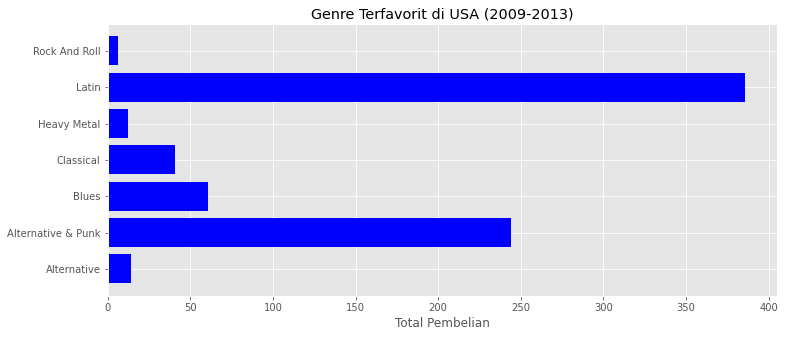

In [48]:
query3 = '''select g.Name as Genre, count(g.Name) as "Total Genre", i.BillingCountry
from genres g
inner join tracks t on g.GenreId = t.GenreId
inner join invoice_items it on t.TrackId = it.TrackId
inner join invoices i on it.InvoiceId = i.invoiceId
group by 1
having i.BillingCountry = "USA"
order by 1 asc
'''
df3 = pd.read_sql(query3, conn)

plt.figure(figsize = (12,5))
plt.barh(df3['Genre'], df3['Total Genre'], color='b')
plt.xlabel('Total Pembelian')
plt.title('Genre Terfavorit di USA (2009-2013)')

In [49]:
df3

,Genre,Total Genre,BillingCountry
0,Alternative,14,USA
1,Alternative & Punk,244,USA
2,Blues,61,USA
3,Classical,41,USA
4,Heavy Metal,12,USA
5,Latin,386,USA
6,Rock And Roll,6,USA


In [50]:
class 